A notebook to test code interactively before implmenting in full in `src/`

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T

import os
import random
from PIL import Image

In [34]:
class RandomErase(nn.Module):
    def __init__(self, p_erase=0.5, aspect_ratio_range=(0.3,3.33), area_range=(0.02,0.25)):
        """The a portion of the image is randomly erased with probability p_erase. 
        The aspect ratio of the erased rectangle lies between the range provided by 
        aspect_ratio_range. The ratio of the area of the rectangle to the area of the
        whole rectangle lies within the area_range.
        
        For more details see the "Bag of Tricks" 2019 paper by Luo et. al."""
        super().__init__()
        self.p = p_erase
        self.r1, self.r2 = aspect_ratio_range
        self.a1, self.a2 = area_range
        
    def forward(self, img):
        C, H, W = img.shape
        
        
        if random.random() < 0.5:
            #perform random erasing
            S = H * W
            
            r_e = random.uniform(self.r1, self.r2)
            S_e = S * random.uniform(self.a1, self.a2)
            
            #r = w/h, S = w*h
            w_e = np.sqrt(r_e * S_e)
            h_e = w_e / r_e
            
            w_e, h_e = int(w_e), int(h_e)
            x_e, y_e = random.randrange(0, W-1), random.randrange(0,H-1)
            
            while (x_e + w_e >= W) or (y_e + h_e >= H):
                x_e, y_e = random.randrange(0, W-1), random.randrange(0,H-1)
            
            #want channel-wise mean
            img[:, y_e : y_e + h_e, x_e : x_e + w_e] = torch.mean(img.view(img.shape[0], -1), dim=1, keepdim=True).unsqueeze(-1)
            
            return img
        else:
            return img

In step 0, img has shape torch.Size([3, 536, 559])
In step 1, img has shape torch.Size([3, 414, 455])
In step 2, img has shape torch.Size([3, 445, 479])
In step 3, img has shape torch.Size([3, 397, 396])
In step 4, img has shape torch.Size([3, 344, 335])
In step 5, img has shape torch.Size([3, 426, 385])
In step 6, img has shape torch.Size([3, 381, 539])
In step 7, img has shape torch.Size([3, 454, 388])


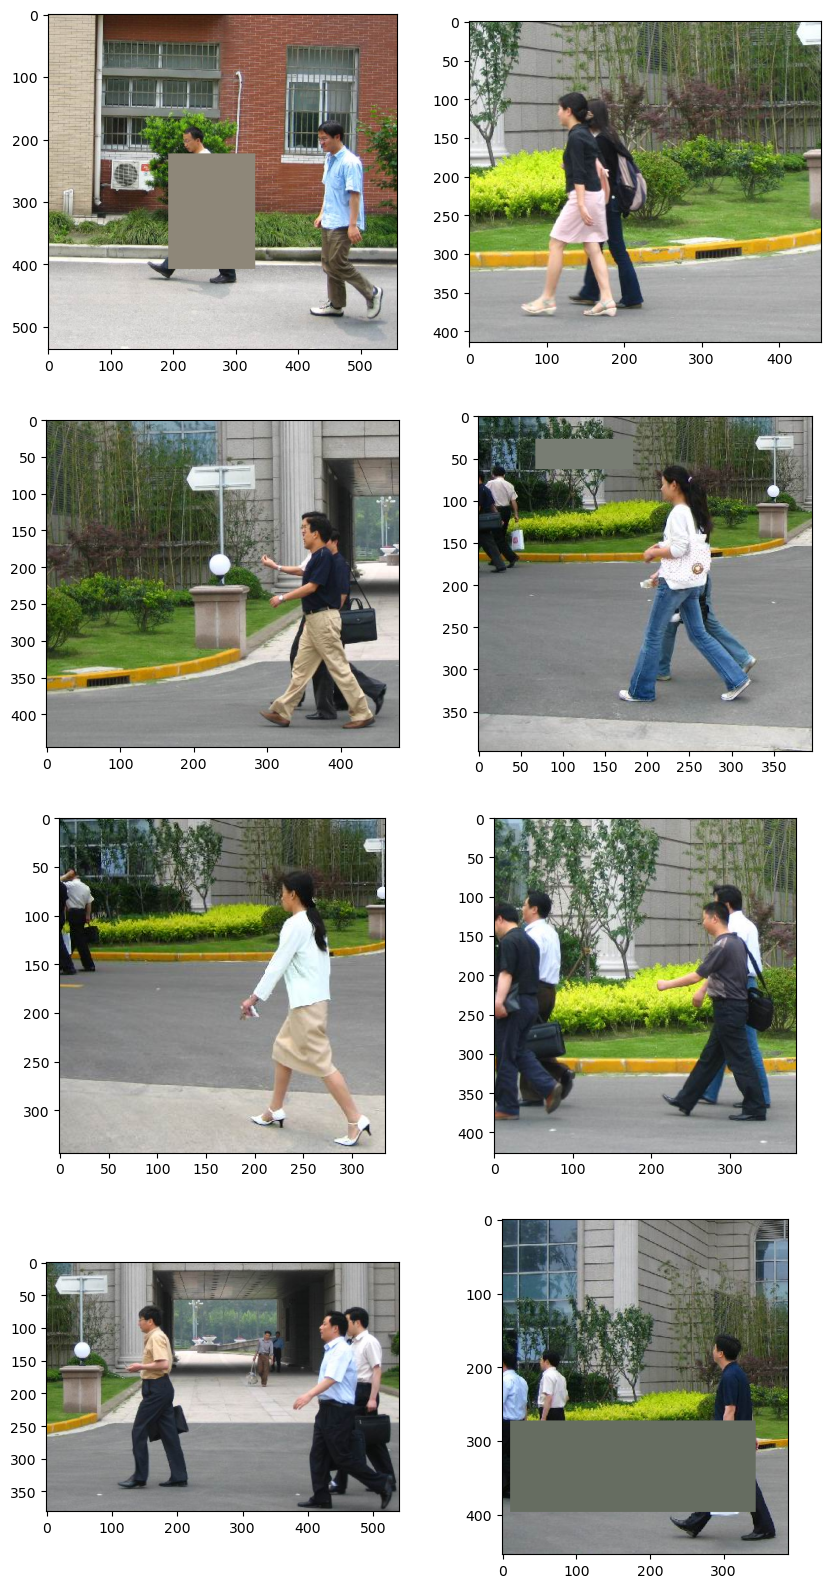

In [35]:
plt.rcParams["figure.figsize"] = (10, 20)


for i in range(8):
    plt.subplot(4,2,i+1)
    img = Image.open("../data/PennFudanPed/PNGImages/FudanPed0000"+ str(i+1) + ".png")
    
    img = T.ToTensor()(img)
    print(f"In step {i}, img has shape {img.shape}")
    img = RandomErase()(img)
    img = img.numpy()
    plt.imshow(np.transpose(img, (1,2,0)))

plt.show()

In [37]:
loss = nn.CrossEntropyLoss(label_smoothing=0.1)

loss(torch.tensor([[0.2,0.8]]), torch.tensor([1]))

tensor(0.4675)